# **Sign Language Translator**

## Import Libraries


In [12]:
# To make sure the correct version of tensorflow is installed which can convert yolov8 onnx model to tflite
# %pip install tensorflow==2.13.0rc0
## If want to use latest version of tensorflow
# %pip install tensorflow --upgrade

Defaulting to user installation because normal site-packages is not writeable
  Using cached tensorflow-2.13.0rc0-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (524.1 MB)
  Using cached keras-2.13.1-py3-none-any.whl.metadata (2.4 kB)
  Using cached tensorboard-2.13.0-py3-none-any.whl (5.6 MB)
  Using cached tensorflow_estimator-2.13.0-py2.py3-none-any.whl.metadata (1.3 kB)
Using cached keras-2.13.1-py3-none-any.whl (1.7 MB)
Using cached tensorflow_estimator-2.13.0-py2.py3-none-any.whl (440 kB)
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.15.0
    Uninstalling tensorflow-estimator-2.15.0:
      Successfully uninstalled tensorflow-estimator-2.15.0
  Attempting uninstall: keras
    Found existing installation: keras 2.15.0
    Uninstalling keras-2.15.0:
      Successfully uninstalled keras-2.15.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.15.1
    Uninstalling tensorboard-2.15.1:
 

In [13]:
%%capture
%pip install ultralytics
import torch
import ultralytics
import tensorflow as tf
from tensorflow import keras
from keras import layers
%pip install keras-cv
import keras_cv
from keras_cv import bounding_box
from keras_cv import visualization
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn import preprocessing
from sklearn.metrics import classification_report, confusion_matrix
%pip install scikit-image
import skimage
from skimage.transform import resize
from sklearn.model_selection import train_test_split
import requests
import json
from keras.preprocessing.image import ImageDataGenerator
import random
import cv2
import os
# from google.colab import files
import io
# from google.colab.patches import cv2_imshow
from PIL import Image
import glob
import shutil
import pathlib
from tqdm.notebook import tqdm
%pip install tensorflow_hub

In [2]:
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  1


In [ ]:
!nvidia-smi

## Data Preprocessing

<h2>Load Datasets</h2>


Roboflow https://public.roboflow.com/object-detection/american-sign-language-letters/1

In [2]:
!curl -L "https://public.roboflow.com/ds/YiFqJk1ben?key=4YTWBkDZe6" > roboflow.zip; unzip -n roboflow.zip; rm roboflow.zip
# !mv -t train test/* valid/*;
# !rm -r test valid README.dataset.txt README.roboflow.txt;

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   903  100   903    0     0   1503      0 --:--:-- --:--:-- --:--:--  1502
100 22.4M  100 22.4M    0     0  5243k      0  0:00:04  0:00:04 --:--:-- 7233k
Archive:  roboflow.zip
 extracting: README.dataset.txt      
 extracting: README.roboflow.txt     
 extracting: data.yaml               
   creating: test/
   creating: test/images/
 extracting: test/images/A22_jpg.rf.f02ad8558ce1c88213b4f83c0bc66bc8.jpg  
 extracting: test/images/B14_jpg.rf.ed5ba6d44f55ab03e62d2baeac4aa1aa.jpg  
 extracting: test/images/B15_jpg.rf.0f0628552139144fc67c453e1f1b7b15.jpg  
 extracting: test/images/B19_jpg.rf.69527cc1f34d694cc04e55db80ed9b1a.jpg  
 extracting: test/images/C17_jpg.rf.ceb81f8ae3c3673bd060ebe71848eca8.jpg  
 extracting: test/images/C19_jpg.rf.577ce02a223c65e89dc4a4eacd130040.jpg  
 extracting: test/images/C22_jpg.rf.e54cbbfdd4ea0670

Roboflow https://universe.roboflow.com/haider-bjz35/gest-859fc

In [15]:
# !curl -L "https://universe.roboflow.com/ds/CInkWQdxoZ?key=0TjerUxwEJ" > roboflow.zip; unzip -n roboflow.zip "*/*/[IA]*" -x "*Apple*" ; rm roboflow.zip

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0

100   903  100   903    0     0   1806      0 --:--:-- --:--:-- --:--:--  1809
100 21.0M  100 21.0M    0     0  4577k      0  0:00:04  0:00:04 --:--:-- 6921k
Archive:  roboflow.zip
 extracting: test/images/A-11-_jpg.rf.948be98cc162e2dabb445a7e72ea216a.jpg  
 extracting: test/images/A-12-_jpg.rf.07986d87b4c9a5d761d1b22d8118a17c.jpg  
 extracting: test/images/I-17-_jpg.rf.35742684ac0d5f5823a9ef155aecb742.jpg  
 extracting: test/images/I-8-_jpg.rf.a8bb412df85f01c3775b8d417dbc67ef.jpg  
 extracting: test/labels/A-11-_jpg.rf.948be98cc162e2dabb445a7e72ea216a.txt  
 extracting: test/labels/A-12-_jpg.rf.07986d87b4c9a5d761d1b22d8118a17c.txt  
 extracting: test/labels/I-17-_jpg.rf.35742684ac0d5f5823a9ef155aecb742.txt  
 extracting: test/labels/I-8-_jpg.rf.a8bb412df85f01c3775b8d417dbc67ef.txt  
 extracting: train/images/A-1-_jpg.rf.e17b3b2c10cf7d79c02d77dde5bd2580.jpg  
 extracting: train/images/A-13-_jpg.rf.fa3e3807353714ef4e0b193558f4cbdd.jpg  
 extracting: train/images/A-14-_jpg.rf.e106e63a8f4

<!-- Correct Classes -->

Roboflow https://universe.roboflow.com/hand-signs-9v6jr/asl-and-fsl-combo  

In [2]:
!curl -L "https://universe.roboflow.com/ds/MzjFV1GcYm?key=mNTM3B32Dy" > roboflow.zip; unzip -n roboflow.zip "*/*/[iAvtdyLkwpr]*_mp4*"; rm roboflow.zip

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   895  100   895    0     0   1643      0 --:--:-- --:--:-- --:--:--  1642
100 61.1M  100 61.1M    0     0  7460k      0  0:00:08  0:00:08 --:--:--  9.8M
Archive:  roboflow.zip
 extracting: test/images/k_mp4-0_jpg.rf.ddeddc034ef778a64f7aa790c0f9f9c4.jpg  
 extracting: test/images/k_mp4-9_jpg.rf.8d6ea2ba06b7201c638be3ed2cc3a397.jpg  
 extracting: test/images/p_mp4-16_jpg.rf.af2cdcac83ab6635503a55480d050519.jpg  
 extracting: test/images/p_mp4-5_jpg.rf.a64c6df3c779a7b00e1139a8545cce1d.jpg  
 extracting: test/images/r_mp4-17_jpg.rf.bb498f392441b6aad2b5b51da1e67b36.jpg  
 extracting: test/images/r_mp4-19_jpg.rf.50b18bd01e7e5df7b8fa414f2bba792d.jpg  
 extracting: test/images/w_mp4-10_jpg.rf.7b90ec1df9e373298ec05fb8ede87b8a.jpg  
 extracting: test/images/w_mp4-2_jpg.rf.995067911318e8b63b12a0d05c843b1d.jpg  
 extracting: test/labels/

Roboflow https://universe.roboflow.com/tfod-p4luj/sign_language-acf74

In [4]:
!curl -L "https://universe.roboflow.com/ds/sX6kbrVSMN?key=1ckOdj2VhH" > roboflow.zip; unzip -n roboflow.zip -x "*_z_*" "*_s_*" "*_j_*"; rm roboflow.zip

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   903  100   903    0     0   1852      0 --:--:-- --:--:-- --:--:--  1850
100 64.4M  100 64.4M    0     0  6913k      0  0:00:09  0:00:09 --:--:-- 9739k
Archive:  roboflow.zip
 extracting: test/images/hand5_a_dif_seg_4_cropped_jpeg.rf.1e992e3afddcaefe90993d108fac1a73.jpg  
 extracting: test/images/hand5_a_dif_seg_5_cropped_jpeg.rf.0d810949fbd71b760fa711883b8df7c8.jpg  
 extracting: test/images/hand5_b_dif_seg_4_cropped_jpeg.rf.80d4353a205a0631f9ca5a08db5b3cc5.jpg  
 extracting: test/images/hand5_b_dif_seg_5_cropped_jpeg.rf.8926e2214c64a13ca6042dea948d4449.jpg  
 extracting: test/images/hand5_c_dif_seg_4_cropped_jpeg.rf.8d49f86ec0666d60003a1f13f04bf40b.jpg  
 extracting: test/images/hand5_c_dif_seg_5_cropped_jpeg.rf.5e5fe5ff09011197112386d793ac3651.jpg  
 extracting: test/images/hand5_d_dif_seg_4_cropped_jpeg.rf.2daeb6c2a80e70

Loicmarie GitHub sign-language-alphabet-recognizer

In [6]:
!mkdir train_cnn

In [7]:
%%capture
!curl -L https://api.github.com/repos/loicmarie/sign-language-alphabet-recognizer/tarball/master | tar -xz --wildcards --strip=2 -C train_cnn loicmarie-sign-language-alphabet-recognizer-*/dataset/*

<h2>Remove remaining Subfolders
</h2>


In [8]:
# directory = "/content/train/"
directory = "/home/atalaydenknalbant/jupyter_notebooks/train_cnn"
source_dir = pathlib.Path(directory)
target_dir = pathlib.Path(directory)
for letter in 'ABCDEFGHIJKLMNOPQRSTUVWXYZ':
    target_dir.joinpath(letter).mkdir(exist_ok=True)

for file in source_dir.iterdir():
    if file.is_file():
        first_letter = file.name[0].upper()
        if first_letter.isalpha():
            shutil.move(file, target_dir.joinpath(first_letter, file.name))
        else:
            os.remove(file)

In [10]:
subfolders = [f.path for f in os.scandir('train_cnn') if f.is_dir()]
for subfolder in subfolders:
  if subfolder == "train_cnn/space" or subfolder == "train_cnn/del" or subfolder == "train_cnn/nothing":
    shutil.rmtree(subfolder)
    continue

In [3]:
!ls train_cnn/

A  B  C  D  E  F  G  H	I  J  K  L  M  N  O  P	Q  R  S  T  U  V  W  X	Y  Z


Define Image size, image channels and number of classes

In [3]:
image_size = 64
img_channel = 3
n_classes = 26 
length = 78000
classes = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 
           'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 
           'W', 'X', 'Y', 'Z']

In [4]:
def get_data(data_dir) :
    images = []
    labels = []
    
    dir_list = os.listdir(data_dir)
    for i in range(len(dir_list)):
        print("Extracting images of symbol ", dir_list[i], "...")
        for image in os.listdir(data_dir + "/" + dir_list[i]):
            img = cv2.imread(data_dir + '/' + dir_list[i] + '/' + image)
            img = cv2.resize(img, (image_size, image_size))
            images.append(img)
            labels.append(i)
    
    return images, labels
        
X, y = get_data("/home/atalaydenknalbant/jupyter_notebooks/train_cnn") 

Extracting images of symbol  B ...
Extracting images of symbol  Y ...
Extracting images of symbol  O ...
Extracting images of symbol  X ...
Extracting images of symbol  C ...
Extracting images of symbol  J ...
Extracting images of symbol  F ...
Extracting images of symbol  A ...
Extracting images of symbol  T ...
Extracting images of symbol  K ...
Extracting images of symbol  S ...
Extracting images of symbol  E ...
Extracting images of symbol  M ...
Extracting images of symbol  G ...
Extracting images of symbol  N ...
Extracting images of symbol  U ...
Extracting images of symbol  L ...
Extracting images of symbol  V ...
Extracting images of symbol  P ...
Extracting images of symbol  W ...
Extracting images of symbol  Z ...
Extracting images of symbol  R ...
Extracting images of symbol  Q ...
Extracting images of symbol  D ...
Extracting images of symbol  I ...
Extracting images of symbol  H ...


In [5]:
def preprocess_data(X, y):
    np_X = np.array(X)
    normalized_X = np_X.astype('float32')/255.0
    
    label_encoded_y = keras.utils.to_categorical(y)
    
    x_train, x_test, y_train, y_test = train_test_split(normalized_X, label_encoded_y, test_size = 0.05, random_state=70)
    
    del normalized_X, label_encoded_y
    return x_train, x_test, y_train, y_test

x_train, x_test, y_train, y_test = preprocess_data(X, y)

In [6]:
print("Training data:", x_train.shape)
print("Test data:", x_test.shape)

Training data: (74100, 64, 64, 3)
Test data: (3900, 64, 64, 3)


Free up some space

In [7]:
del X
del y

Resize Images

Convert datasets and merge them into single dataframe

In [5]:
# X = np.empty((length, image_size, image_size, 3), dtype=np.float32)
# y = np.empty((length,), dtype=np.int)
# counter = 0
# for image in glob.glob("/home/atalaydenknalbant/jupyter_notebooks/train_cnn/**/*.jpg", recursive=True):
#     X[counter] = np.array(Image.open(image).resize((image_size, image_size))).reshape((-1, image_size, image_size, img_channel))
#     y[counter] = image[54]
#     counter += 1

MemoryError: Unable to allocate 43.7 GiB for an array with shape (78000, 224, 224, 3) and data type float32

In [8]:
# df = pd.DataFrame(
#     data = [ [np.array(Image.open(image).resize((image_size, image_size))).reshape((-1, image_size, image_size, img_channel)), image[54]] for image in glob.glob("/home/atalaydenknalbant/jupyter_notebooks/train_cnn/**/*.jpg", recursive=True)],
#     columns = ['img_arr', 'image_label'])

In [82]:
# X_train, X_test, y_train, y_test = train_test_split(np.array(df['img_arr'].values), df['image_label'], test_size=0.1, random_state=42, stratify=df['image_label'])


In [86]:
# X_train.dtype

dtype('O')

Resize Images

How Many Images The Merged Dataframe Has?

In [ ]:
print(f"Total Images: {len(df.index)}")

Total Images: 79728


Find Unique labels in dataset(ASL has 26 unique Letters)

In [9]:
df['image_label'].nunique()

26

In [14]:
df.head(500)

,image_path,image_label,image_width,image_height
0,B/B1692.jpg,B,200,200
1,B/B2525.jpg,B,200,200
2,B/B98.jpg,B,200,200
3,B/B1389.jpg,B,200,200
4,B/B2110.jpg,B,200,200
...,...,...,...,...
495,B/B933.jpg,B,200,200
496,B/B2071.jpg,B,200,200
497,B/B1669.jpg,B,200,200
498,B/B2227.jpg,B,200,200


Convert image_labels column to numbers for training

In [10]:
labels = df['image_label'].unique()
labels = sorted(labels)
label_dict = {label: i for i, label in enumerate(labels, 1)}

In [11]:
df['image_label_num'] = df['image_label'].map(label_dict)

In [ ]:
df.head()

,image_path,image_label,image_width,image_height,image_label_num
0,B/B1692.jpg,B,200,200,2
1,B/B2525.jpg,B,200,200,2
2,B/B98.jpg,B,200,200,2
3,B/B1389.jpg,B,200,200,2
4,B/B2110.jpg,B,200,200,2


Find the minimum resolution in dataset

In [18]:
df['image_width'].min()

200

In [17]:
df['image_height'].min()

200

In [49]:
img = cv2.imread("/content/train/S1810.jpg")
cv2_imshow(img)

[ WARN:0@1964.940] global loadsave.cpp:248 findDecoder imread_('/content/train/S1810.jpg'): can't open/read file: check file path/integrity


NameError: name 'cv2_imshow' is not defined

In [ ]:
# img = cv2.imread("/content/train/A0_jpg.rf.292a080422ba984985192f413101af41.jpg")
# cv2_imshow(img)

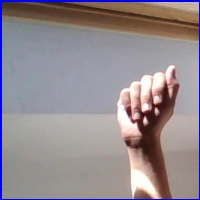

In [ ]:
img = cv2.imread("/content/train/A1000.jpg")
cv2_imshow(img)

Remove Reduntant Columns

In [12]:
df_final = df.drop(['image_height', 'image_width', 'image_label_num'], axis=1)

Splitting dataset into train test valid
%99 Train
%1 Test
%1 Validation

In [13]:
df_final = df_final.sample(frac=1, random_state=42)
train, test, valid = np.split(df_final, [int(.99*len(df_final)), int(.995*len(df_final))])

/home/atalaydenknalbant/.local/lib/python3.10/site-packages/numpy/core/fromnumeric.py:59: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


In [22]:
train

,image_path,image_label
20565,F/F924.jpg,F
16252,J/J2830.jpg,J
34277,E/E856.jpg,E
53913,V/V2170.jpg,V
21537,A/A2782.jpg,A
...,...,...
27139,T/T2069.jpg,T
72303,D/D419.jpg,D
71158,D/D1105.jpg,D
1605,B/B42.jpg,B


In [14]:
test_labels = test['image_label'] 
test.drop(['image_label'], axis=1, inplace=True)

In [24]:
print("train shape: {}".format(train.shape))
print("test shape: {}".format(test.shape))
print("valid shape: {}".format(valid.shape))

train shape: (78930, 2)
test shape: (399, 1)
valid shape: (399, 2)


Total Appearances of Unique Labels

In [15]:
label_counts = train['image_label'].value_counts()
label_counts = train['image_label'].value_counts().to_dict()
label_counts

{'J': 3060,
 'I': 3055,
 'S': 3054,
 'Z': 3047,
 'G': 3047,
 'L': 3044,
 'D': 3042,
 'C': 3041,
 'F': 3041,
 'H': 3039,
 'K': 3039,
 'W': 3038,
 'E': 3036,
 'N': 3036,
 'Q': 3034,
 'X': 3031,
 'O': 3030,
 'U': 3029,
 'V': 3029,
 'A': 3028,
 'T': 3026,
 'M': 3024,
 'P': 3022,
 'B': 3021,
 'R': 3020,
 'Y': 3017}

### Implementing Datagen for model input

In [16]:
# datagen = ImageDataGenerator(horizontal_flip=True,
#                              rotation_range=50,
#                              zoom_range=0.2,
#                              width_shift_range=0.2,
#                              height_shift_range=0.2,
#                              rescale=1./255)
# test_datagen=ImageDataGenerator(rescale=1./255.)
# # directory = "/content/train/"
# directory = "/home/atalaydenknalbant/jupyter_notebooks/train/"
# batch_size = 64
# epochs = 100
# image_size = 224
# img_channel = 3
# n_classes = 26 

In [17]:
# train_gen = datagen.flow_from_dataframe(dataframe = train,
#                                         directory = directory,
#                                         x_col="image_path",
#                                         y_col="image_label",
#                                         target_size=(image_size,image_size),
#                                         class_mode="categorical",
#                                         subset="training",
#                                         save_format='jpg',
#                                              classes=labels,
#                                         seed=42
#                                           )
# test_gen = test_datagen.flow_from_dataframe(dataframe = test,
#                                        directory = directory,
#                                         x_col="image_path",
#                                         y_col=None,
#                                         target_size=(image_size,image_size),
#                                         class_mode=None,
#                                         save_format='jpg',
#                                         seed=42
#                                           )

Found 78930 validated image filenames belonging to 26 classes.
Found 399 validated image filenames.


## Data Visualization

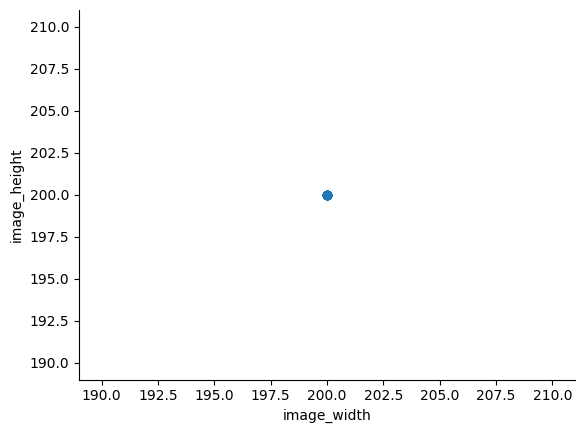

In [ ]:
df.plot(kind='scatter', x='image_width', y='image_height', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
#df.plot(kind='scatter', x='index', y='image_width', s=32, alpha=.8)
#plt.gca().spines[['top', 'right',]].set_visible(False)

Bar chart for the number samples for each letter.

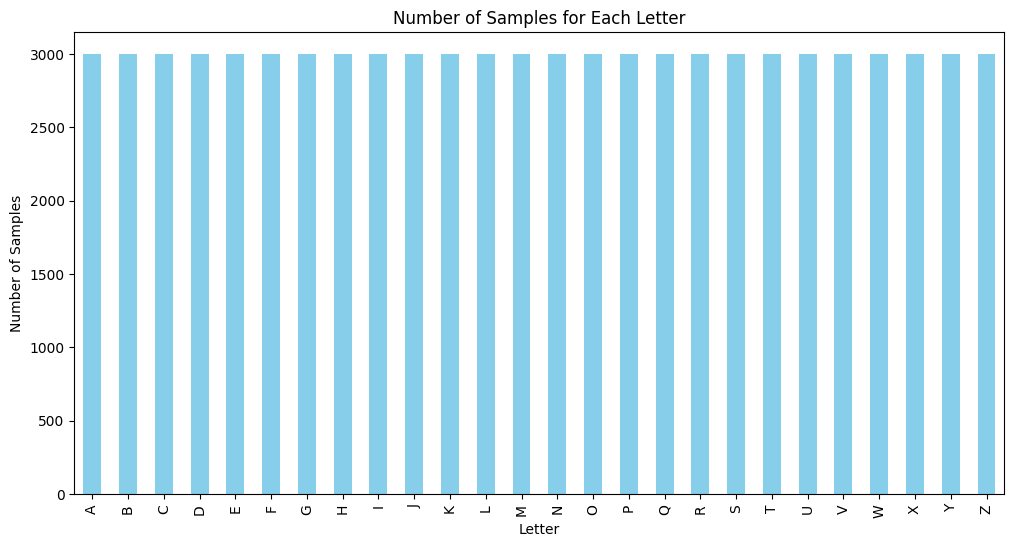

In [ ]:
image_label = "image_label"

letter_counts = df[image_label].value_counts()

plt.figure(figsize=(12,6))
letter_counts.sort_index().plot(kind='bar', color='skyblue')
plt.title(f"Number of Samples for Each Letter")
plt.xlabel("Letter")
plt.ylabel("Number of Samples")
plt.show()

In [ ]:
img = cv2.imread("/content/train/A0_jpg.rf.292a080422ba984985192f413101af41.jpg")
cv2_imshow(img)

AttributeError: 'NoneType' object has no attribute 'clip'

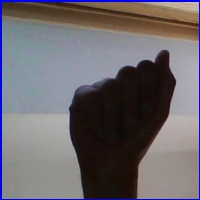

In [ ]:
img = cv2.imread("/content/train/A100.jpg")
cv2_imshow(img)

## Modeling

### Define Callbacks

In [9]:
checkpoint_filepath = os.path.join('checkpoints', 'op' + \
        '.{epoch:03d}-{val_loss:.3f}-best.h5')
early_stopping = keras.callbacks.EarlyStopping(monitor='val_loss',
                              min_delta=0.001,
                              patience= 4,
                              restore_best_weights= True,
                              verbose = 0)
model_checkpoint_callback = keras.callbacks.ModelCheckpoint(
                                            filepath=checkpoint_filepath,
                                            save_weights_only=True,
                                            monitor='val_accuracy',
                                            verbose=1,
                                            mode='max',
                                            save_best_only=True)
# reduce_learning_rate = keras.callbacks.ReduceLROnPlateau(monitor='accuracy',
#                                          patience = 2,
#                                          factor=0.5 ,
#                                          verbose = 1)

In [19]:
import tensorflow_hub as hub
url = "https://tfhub.dev/google/tf2-preview/mobilenet_v2/classification/4"
download_model = hub.KerasLayer(url,input_shape=(224,224,img_channel))
model = keras.Sequential([
     download_model,
     layers.Dense(26, activation='softmax')
])
model.compile(optimizer='adam',
loss="categorical_crossentropy",
metrics=['accuracy'])
print(model.summary())


2024-01-30 21:02:46.049240: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-01-30 21:02:46.049344: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-01-30 21:02:46.049366: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-01-30 21:02:46.150494: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-01-30 21:02:46.150734: I external/local_xla/xla/stream_executor

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 1001)              3540265   
                                                                 
 dense (Dense)               (None, 26)                26052     
                                                                 
Total params: 3566317 (13.60 MB)
Trainable params: 26052 (101.77 KB)
Non-trainable params: 3540265 (13.51 MB)
_________________________________________________________________
None


In [20]:
model.fit(train_gen,
          batch_size=batch_size,
          callbacks=[early_stoping,reduce_learning_rate],
          epochs=epochs)

Epoch 1/130


2024-01-30 21:02:49.468238: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:454] Loaded cuDNN version 8904
2024-01-30 21:02:49.593273: W external/local_xla/xla/stream_executor/gpu/asm_compiler.cc:225] Falling back to the CUDA driver for PTX compilation; ptxas does not support CC 8.9
2024-01-30 21:02:49.593301: W external/local_xla/xla/stream_executor/gpu/asm_compiler.cc:228] Used ptxas at ptxas
2024-01-30 21:02:49.593372: W external/local_xla/xla/stream_executor/gpu/redzone_allocator.cc:322] UNIMPLEMENTED: ptxas ptxas too old. Falling back to the driver to compile.
Relying on driver to perform ptx compilation. 
Modify $PATH to customize ptxas location.
This message will be only logged once.
2024-01-30 21:02:49.790656: I external/local_xla/xla/service/service.cc:168] XLA service 0x7f83395e6850 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2024-01-30 21:02:49.790695: I external/local_xla/xla/service/service.cc:176]   StreamExecutor devi

2467/2467 [==============================] - 343s 138ms/step - loss: 1.0828 - accuracy: 0.6782 - lr: 0.0010
Epoch 2/130
2467/2467 [==============================] - 334s 136ms/step - loss: 0.7838 - accuracy: 0.7630 - lr: 0.0010
Epoch 3/130
2467/2467 [==============================] - 329s 133ms/step - loss: 0.7320 - accuracy: 0.7790 - lr: 0.0010
Epoch 4/130
2467/2467 [==============================] - 327s 132ms/step - loss: 0.6997 - accuracy: 0.7891 - lr: 0.0010
Epoch 5/130
2467/2467 [==============================] - 327s 133ms/step - loss: 0.6814 - accuracy: 0.7957 - lr: 0.0010
Epoch 6/130
2467/2467 [==============================] - 328s 133ms/step - loss: 0.6594 - accuracy: 0.8018 - lr: 0.0010
Epoch 7/130
2467/2467 [==============================] - 322s 130ms/step - loss: 0.6547 - accuracy: 0.8031 - lr: 0.0010
Epoch 8/130
2467/2467 [==============================] - 323s 131ms/step - loss: 0.6445 - accuracy: 0.8062 - lr: 0.0010
Epoch 9/130
2467/2467 [=============================

In [25]:
predicted_classes = model.predict(test_gen)
predicted_classes = predicted_classes.argmax(axis=1)

13/13 [==============================] - 0s 19ms/step


In [27]:
model.predict(test_gen)[0]

13/13 [==============================] - 0s 18ms/step


array([2.77945066e-13, 1.06107985e-08, 2.22076401e-02, 1.27375017e-06,
       1.10209009e-09, 4.95573785e-03, 1.28080801e-03, 6.34553680e-06,
       5.86357455e-05, 5.51866926e-03, 1.48542667e-05, 7.68471807e-07,
       6.26680787e-08, 6.57929391e-08, 1.73258013e-05, 2.69400269e-01,
       6.96039259e-01, 2.59891209e-07, 4.21297727e-06, 1.86458492e-04,
       1.48880617e-05, 1.11553294e-04, 4.87469479e-05, 1.72596947e-06,
       3.87205591e-06, 1.26561325e-04], dtype=float32)

In [29]:
train_gen.class_indices

{'A': 0,
 'B': 1,
 'C': 2,
 'D': 3,
 'E': 4,
 'F': 5,
 'G': 6,
 'H': 7,
 'I': 8,
 'J': 9,
 'K': 10,
 'L': 11,
 'M': 12,
 'N': 13,
 'O': 14,
 'P': 15,
 'Q': 16,
 'R': 17,
 'S': 18,
 'T': 19,
 'U': 20,
 'V': 21,
 'W': 22,
 'X': 23,
 'Y': 24,
 'Z': 25}

### Custom CNN Model

In [10]:
model = keras.Sequential([
layers.Conv2D(32, (5, 5), input_shape=(image_size,image_size,img_channel), activation='relu'),
layers.Conv2D(32, (5, 5), activation='relu'),
layers.MaxPooling2D((2, 2)) ,
layers.Conv2D(64, (5, 5), activation='relu'),
layers.Conv2D(64, (5, 5), activation='relu') ,
layers.MaxPooling2D((2, 2)) ,
layers.Flatten() ,
layers.Dense(128, activation='relu') ,
layers.Dense(26, activation='softmax')
])
model.summary()
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 60, 60, 32)        2432      
                                                                 
 conv2d_1 (Conv2D)           (None, 56, 56, 32)        25632     
                                                                 
 max_pooling2d (MaxPooling2  (None, 28, 28, 32)        0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 24, 24, 64)        51264     
                                                                 
 conv2d_3 (Conv2D)           (None, 20, 20, 64)        102464    
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 10, 10, 64)        0         
 g2D)                                                   

In [11]:
hst = model.fit(x_train, y_train, batch_size=32, epochs=30, validation_split=0.01, callbacks=[early_stopping, model_checkpoint_callback], verbose=1)

Epoch 1/30


I0000 00:00:1706966615.285693    2475 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


2293/2293 [==============================] - ETA: 0s - loss: 0.7562 - accuracy: 0.7693
Epoch 1: val_accuracy improved from -inf to 0.96491, saving model to checkpoints/op.001-0.114-best.h5
2293/2293 [==============================] - 20s 7ms/step - loss: 0.7562 - accuracy: 0.7693 - val_loss: 0.1143 - val_accuracy: 0.9649
Epoch 2/30
2288/2293 [============================>.] - ETA: 0s - loss: 0.0709 - accuracy: 0.9775
Epoch 2: val_accuracy improved from 0.96491 to 0.99055, saving model to checkpoints/op.002-0.027-best.h5
2293/2293 [==============================] - 15s 7ms/step - loss: 0.0709 - accuracy: 0.9775 - val_loss: 0.0270 - val_accuracy: 0.9906
Epoch 3/30
2290/2293 [============================>.] - ETA: 0s - loss: 0.0466 - accuracy: 0.9859
Epoch 3: val_accuracy did not improve from 0.99055
2293/2293 [==============================] - 16s 7ms/step - loss: 0.0466 - accuracy: 0.9859 - val_loss: 0.0293 - val_accuracy: 0.9906
Epoch 4/30
2288/2293 [============================>.] - E

#### Evaluate Model

In [12]:
model.evaluate(x_test, y_test)

122/122 [==============================] - 1s 5ms/step - loss: 0.0241 - accuracy: 0.9918


[0.024064525961875916, 0.9917948842048645]

#### Test Model

122/122 - 0s - 238ms/epoch - 2ms/step


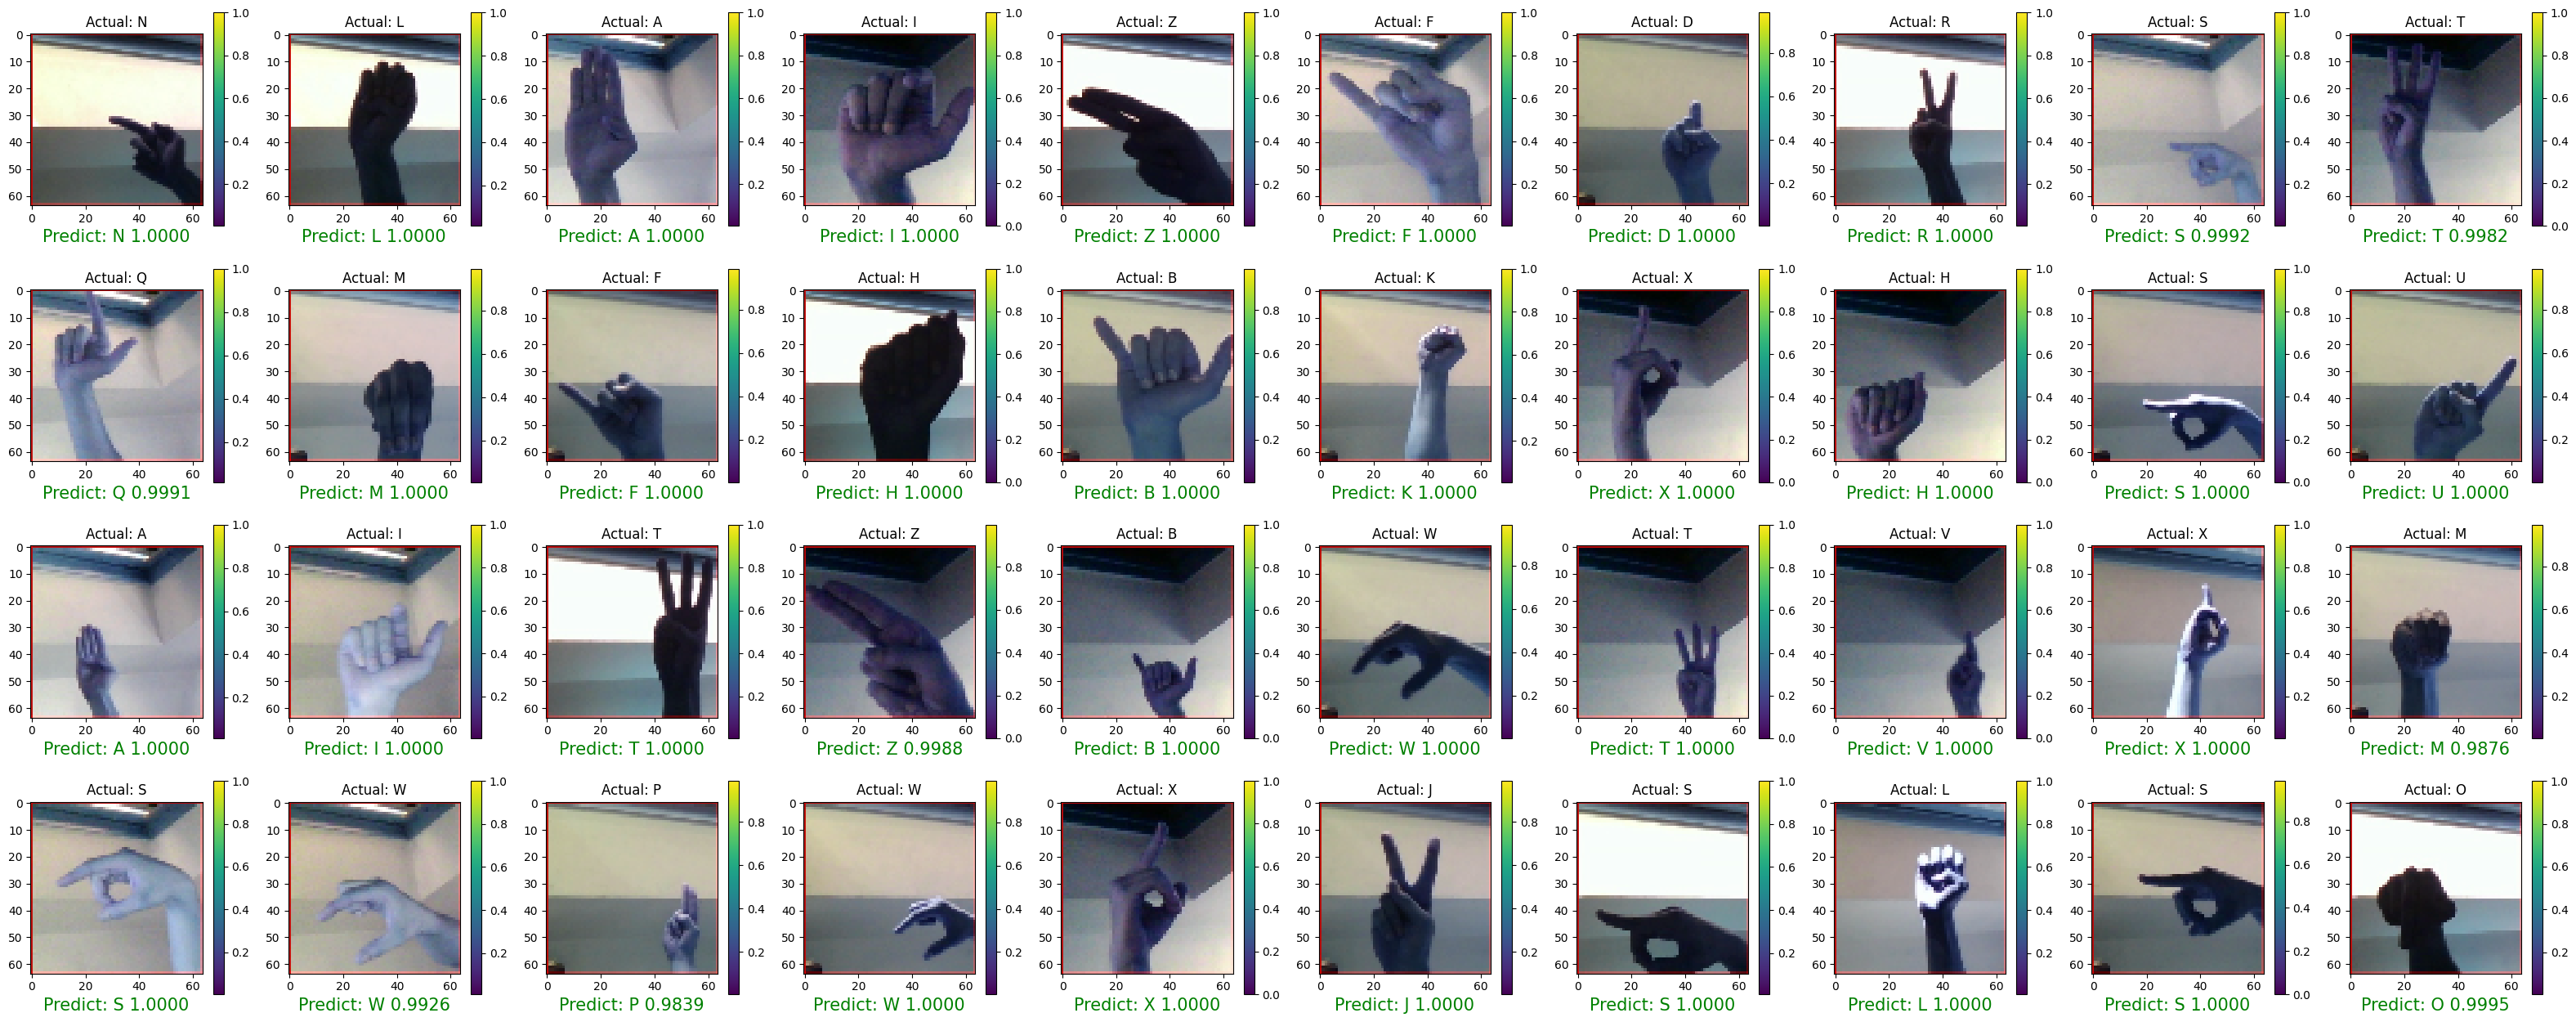

In [19]:
predictions = model.predict(x_test,verbose=2)
i=0

fig = plt.figure(figsize=(40, 40))
for e in zip(y_test, predictions):
  fig.add_subplot(10, 10, i+1)
  plt.imshow(x_test[i])
  # plt.colorbar()
  plt.grid(False)
  plt.subplots_adjust(hspace=0.25)
  color = 'green' if classes[np.argmax(y_test[i])] == classes[np.argmax(predictions[i])] else "red"
  plt.title(f"Actual: {classes[np.argmax(y_test[i])]}", color=color,fontsize=40)
  plt.xlabel(f"Predict: {classes[np.argmax(predictions[i])]} {'%.4f' % np.max(predictions[i])}",color=color,fontsize=40)
  i+=1
  if i == 40:
    break

#### Load Model

In [2]:
cnn_model = tf.keras.models.load_model('cnn_model.h5')

#### Save Model

In [14]:
model.save('cnn_model.h5')

/home/atalaydenknalbant/.local/lib/python3.10/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


122/122 [==============================] - 0s 2ms/step


ValueError: Classification metrics can't handle a mix of multilabel-indicator and multiclass targets

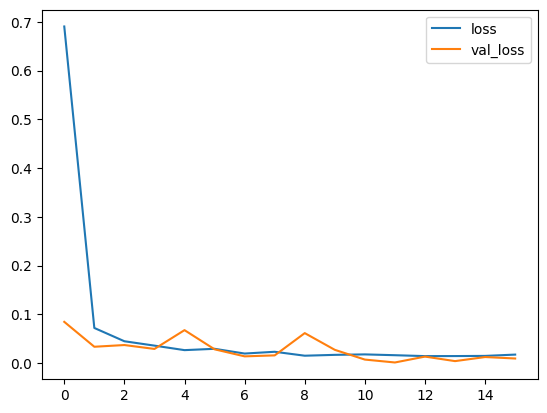

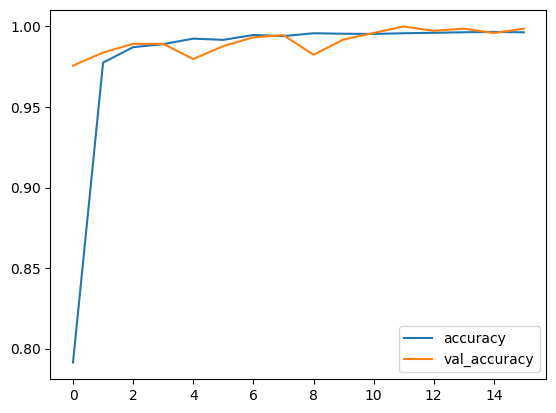

In [30]:
def eval(metrics,model, X_test, y_test, y_cat_test):
    metrics[['loss','val_loss']].plot() ##plot loss and val_loss as per requested

    metrics[['accuracy','val_accuracy']].plot() ##plot loss and val_loss as per requested

    model.evaluate(X_test,y_test,verbose=0) 

    predictions = model.predict(X_test) 
    predictions = np.argmax(predictions, axis=1) 

    print(classification_report(y_test,predictions))

    plt.figure(figsize=(12,12)) 
    sns.heatmap(confusion_matrix(y_test,predictions)) 
    plt.show()
eval(pd.DataFrame(hst.history),model, x_test, y_test, keras.utils.to_categorical(y_test,26))    

### Yolov8 Model

#### Roboflow only with bounding box data

In [ ]:
# %pip install -U ultralytics

In [1]:
from ultralytics import YOLO

model = YOLO("yolov8x.pt")  

model.train(data="/home/atalaydenknalbant/jupyter_notebooks/data.yaml", imgsz=224, epochs=50, seed=42)  
# metrics = model.val()  # evaluate model performance on the validation set
# results = model("test/images/C23_jpg.rf.cff2647e71600ac354da45cb87eca667.jpg")  # predict on an image
model.export(format="tflite") 

Ultralytics YOLOv8.1.9 🚀 Python-3.10.12 torch-2.2.0+cu121 CUDA:0 (NVIDIA GeForce RTX 4090 Laptop GPU, 16376MiB)
engine/trainer: task=detect, mode=train, model=yolov8x.pt, data=/home/atalaydenknalbant/jupyter_notebooks/data.yaml, epochs=50, time=None, patience=50, batch=16, imgsz=224, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train8, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=42, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_

train: Scanning /home/atalaydenknalbant/jupyter_notebooks/train/labels... 6148 images, 0 backgrounds, 0 corrupt: 100%|██████████| 6148/6148 [00:04<00:00, 1242.29it/s]

train: New cache created: /home/atalaydenknalbant/jupyter_notebooks/train/labels.cache



val: Scanning /home/atalaydenknalbant/jupyter_notebooks/valid/labels... 244 images, 0 backgrounds, 0 corrupt: 100%|██████████| 244/244 [00:00<00:00, 756.85it/s]

val: New cache created: /home/atalaydenknalbant/jupyter_notebooks/valid/labels.cache


Plotting labels to runs/detect/train8/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000333, momentum=0.9) with parameter groups 97 weight(decay=0.0), 104 weight(decay=0.0005), 103 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 224 train, 224 val
Using 8 dataloader workers
Logging results to runs/detect/train8
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50      3.15G     0.6359       1.78      1.123         14        224: 100%|██████████| 385/385 [00:45<00:00,  8.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  5.89it/s]


                   all        244        244      0.688      0.712      0.797      0.671

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50       3.2G     0.5803      1.187      1.078         10        224: 100%|██████████| 385/385 [00:40<00:00,  9.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  7.78it/s]

                   all        244        244      0.775      0.722      0.827       0.67



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50      3.23G     0.5785      1.106      1.068         11        224: 100%|██████████| 385/385 [00:38<00:00, 10.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  7.74it/s]

                   all        244        244      0.803      0.834      0.882      0.715



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50      3.23G     0.5545      1.005      1.055         13        224: 100%|██████████| 385/385 [00:39<00:00,  9.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  7.02it/s]

                   all        244        244      0.847      0.827      0.912      0.756



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50      3.23G     0.5252     0.9178      1.038         10        224: 100%|██████████| 385/385 [00:41<00:00,  9.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  6.79it/s]

                   all        244        244      0.904      0.814       0.92      0.753



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50      3.21G     0.4953     0.8205      1.023         13        224: 100%|██████████| 385/385 [00:43<00:00,  8.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  6.83it/s]

                   all        244        244      0.896      0.899      0.958      0.832



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50      3.23G     0.4781     0.7756      1.014         10        224: 100%|██████████| 385/385 [00:44<00:00,  8.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  6.39it/s]

                   all        244        244      0.917      0.883       0.95      0.803



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50      3.24G     0.4647     0.7227      1.007         11        224: 100%|██████████| 385/385 [00:46<00:00,  8.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  6.66it/s]

                   all        244        244      0.874      0.903      0.942      0.797



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50       3.2G     0.4477     0.6876     0.9983          7        224: 100%|██████████| 385/385 [00:46<00:00,  8.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  6.27it/s]

                   all        244        244      0.915      0.883      0.961      0.825



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50      3.21G     0.4351      0.649     0.9883         10        224: 100%|██████████| 385/385 [00:48<00:00,  7.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  6.44it/s]

                   all        244        244       0.93      0.942      0.976      0.847



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50      3.23G     0.4243     0.6132     0.9843          9        224: 100%|██████████| 385/385 [00:46<00:00,  8.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  6.32it/s]

                   all        244        244      0.911      0.929      0.966      0.821



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50      3.23G     0.4203     0.6031     0.9838          9        224: 100%|██████████| 385/385 [00:47<00:00,  8.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  6.71it/s]

                   all        244        244       0.92      0.924      0.958      0.825



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50      3.23G     0.4144     0.5856     0.9808         14        224: 100%|██████████| 385/385 [00:47<00:00,  8.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  6.38it/s]

                   all        244        244      0.901      0.904      0.949      0.793



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50      3.21G      0.408      0.565     0.9771         11        224: 100%|██████████| 385/385 [00:45<00:00,  8.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  6.73it/s]

                   all        244        244      0.934      0.926      0.971      0.806



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50      3.24G     0.3966     0.5314     0.9724         11        224: 100%|██████████| 385/385 [00:44<00:00,  8.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  6.99it/s]

                   all        244        244      0.941      0.938      0.978       0.82



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50      3.24G     0.3915     0.5321     0.9677         11        224: 100%|██████████| 385/385 [00:44<00:00,  8.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  6.57it/s]

                   all        244        244      0.944      0.907      0.974      0.843



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50       3.2G     0.3863     0.5228     0.9659          8        224: 100%|██████████| 385/385 [00:46<00:00,  8.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  6.62it/s]

                   all        244        244      0.937      0.926      0.975      0.849



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50       3.2G     0.3912     0.5112     0.9722         13        224: 100%|██████████| 385/385 [00:44<00:00,  8.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  6.44it/s]

                   all        244        244      0.934      0.933      0.971      0.836



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50      3.25G     0.3825      0.494     0.9643         10        224: 100%|██████████| 385/385 [00:46<00:00,  8.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  6.18it/s]

                   all        244        244      0.943      0.947      0.976      0.831



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50      3.24G     0.3819     0.4893     0.9634          7        224: 100%|██████████| 385/385 [00:47<00:00,  8.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  6.15it/s]

                   all        244        244      0.953      0.904      0.973      0.835



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50      3.24G     0.3709     0.4741     0.9598          8        224: 100%|██████████| 385/385 [00:46<00:00,  8.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  6.68it/s]

                   all        244        244      0.939      0.902      0.963      0.832



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50      3.21G     0.3726     0.4613     0.9598         12        224: 100%|██████████| 385/385 [00:44<00:00,  8.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  6.88it/s]

                   all        244        244      0.927      0.903      0.963      0.829



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50      3.25G     0.3707      0.457     0.9606          6        224: 100%|██████████| 385/385 [00:44<00:00,  8.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  6.77it/s]

                   all        244        244      0.931      0.942      0.972      0.815



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50      3.24G     0.3636     0.4424     0.9542         12        224: 100%|██████████| 385/385 [00:46<00:00,  8.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  6.41it/s]

                   all        244        244      0.957      0.946      0.978      0.846



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50      3.21G     0.3588     0.4357     0.9556          9        224: 100%|██████████| 385/385 [00:45<00:00,  8.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  6.75it/s]

                   all        244        244      0.943      0.957      0.965      0.843



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50      3.22G     0.3558     0.4317     0.9526          6        224: 100%|██████████| 385/385 [00:45<00:00,  8.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  6.40it/s]

                   all        244        244      0.942      0.927      0.969       0.82



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50      3.24G     0.3485      0.411     0.9474          7        224: 100%|██████████| 385/385 [00:48<00:00,  7.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  6.14it/s]

                   all        244        244      0.953      0.938      0.981      0.837



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50      3.23G     0.3459     0.4063      0.948         11        224: 100%|██████████| 385/385 [00:47<00:00,  8.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  6.16it/s]

                   all        244        244      0.967      0.933      0.982      0.837



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50      3.23G     0.3448     0.4056     0.9478         10        224: 100%|██████████| 385/385 [00:46<00:00,  8.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  6.23it/s]

                   all        244        244      0.939      0.931      0.967      0.822



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50       3.2G     0.3426     0.3965     0.9489         12        224: 100%|██████████| 385/385 [00:47<00:00,  8.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  6.66it/s]

                   all        244        244      0.931      0.915       0.97      0.837



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50      3.24G     0.3422     0.3829     0.9454         11        224: 100%|██████████| 385/385 [00:46<00:00,  8.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  6.40it/s]

                   all        244        244      0.934      0.958      0.973      0.844



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50      3.24G     0.3358     0.3706     0.9413         15        224: 100%|██████████| 385/385 [00:47<00:00,  8.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  6.43it/s]

                   all        244        244      0.967      0.942      0.975      0.827



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50      3.24G     0.3269     0.3634     0.9405         13        224: 100%|██████████| 385/385 [00:47<00:00,  8.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  6.13it/s]

                   all        244        244      0.949      0.935      0.969      0.825



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50      3.21G     0.3264     0.3601     0.9427          8        224: 100%|██████████| 385/385 [00:51<00:00,  7.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  6.21it/s]

                   all        244        244      0.954      0.935      0.974      0.832



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50      3.24G     0.3235     0.3534     0.9387         14        224: 100%|██████████| 385/385 [00:48<00:00,  7.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  6.51it/s]

                   all        244        244      0.942       0.91      0.969      0.834



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/50      3.24G     0.3221     0.3429      0.937         16        224: 100%|██████████| 385/385 [00:44<00:00,  8.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  6.83it/s]

                   all        244        244      0.963      0.925      0.975       0.85



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50      3.22G     0.3157     0.3372      0.936          8        224: 100%|██████████| 385/385 [00:46<00:00,  8.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  6.72it/s]

                   all        244        244      0.951      0.929       0.98      0.834



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/50      3.21G     0.3087     0.3258     0.9322         11        224: 100%|██████████| 385/385 [00:45<00:00,  8.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  6.41it/s]

                   all        244        244      0.947      0.906      0.972      0.832



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/50      3.23G     0.3108     0.3179     0.9328         11        224: 100%|██████████| 385/385 [00:46<00:00,  8.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  6.68it/s]

                   all        244        244      0.938      0.949      0.979      0.845



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/50      3.22G      0.305     0.3127     0.9287         11        224: 100%|██████████| 385/385 [00:46<00:00,  8.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  6.43it/s]

                   all        244        244      0.956      0.921       0.98      0.848


Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/50      3.25G     0.2128     0.1292     0.8699          4        224: 100%|██████████| 385/385 [00:47<00:00,  8.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  6.57it/s]

                   all        244        244       0.94      0.929      0.969      0.823



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/50      3.23G     0.2111      0.125     0.8733          4        224: 100%|██████████| 385/385 [00:46<00:00,  8.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  6.60it/s]

                   all        244        244      0.936      0.921      0.968      0.833



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/50      3.25G     0.2062      0.123      0.868          4        224: 100%|██████████| 385/385 [00:46<00:00,  8.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  6.55it/s]

                   all        244        244      0.942      0.921      0.975      0.834



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/50      3.24G     0.2003     0.1184     0.8654          4        224: 100%|██████████| 385/385 [00:44<00:00,  8.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  6.76it/s]

                   all        244        244      0.927      0.931      0.968      0.833



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/50      3.24G     0.1948     0.1145     0.8639          4        224: 100%|██████████| 385/385 [00:44<00:00,  8.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  6.61it/s]

                   all        244        244      0.955      0.948      0.978      0.847



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/50      3.21G     0.1932     0.1098     0.8639          4        224: 100%|██████████| 385/385 [00:49<00:00,  7.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  6.34it/s]

                   all        244        244      0.965      0.932      0.983      0.848



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/50      3.25G     0.1893     0.1075     0.8622          4        224: 100%|██████████| 385/385 [00:46<00:00,  8.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  6.24it/s]

                   all        244        244      0.967      0.932      0.983      0.845



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/50      3.25G     0.1854     0.1042      0.864          4        224: 100%|██████████| 385/385 [00:47<00:00,  8.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  5.61it/s]

                   all        244        244      0.969      0.931      0.979      0.841



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/50      3.23G     0.1806     0.1013     0.8573          4        224: 100%|██████████| 385/385 [00:49<00:00,  7.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  6.10it/s]

                   all        244        244       0.97      0.941       0.98       0.84



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/50      3.21G      0.176    0.09862     0.8577          4        224: 100%|██████████| 385/385 [00:47<00:00,  8.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  6.49it/s]

                   all        244        244      0.971      0.937       0.98      0.845



50 epochs completed in 0.675 hours.
Optimizer stripped from runs/detect/train8/weights/last.pt, 136.7MB
Optimizer stripped from runs/detect/train8/weights/best.pt, 136.7MB

Validating runs/detect/train8/weights/best.pt...
Ultralytics YOLOv8.1.9 🚀 Python-3.10.12 torch-2.2.0+cu121 CUDA:0 (NVIDIA GeForce RTX 4090 Laptop GPU, 16376MiB)
Model summary (fused): 268 layers, 68148606 parameters, 0 gradients, 257.5 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  4.66it/s]


                   all        244        244      0.963      0.925      0.975       0.85
                     A        244          8      0.792          1      0.884       0.69
                     B        244          9          1      0.869      0.995      0.882
                     C        244          3      0.968          1      0.995      0.895
                     D        244         10      0.896          1      0.995      0.877
                     E        244          4      0.971          1      0.995      0.895
                     F        244          8       0.92          1      0.995      0.878
                     G        244          5      0.981          1      0.995      0.877
                     H        244          9      0.999          1      0.995      0.775
                     I        244          6      0.815      0.833       0.73      0.641
                     J        244          8      0.992          1      0.995      0.627
                     

'runs/detect/train8/weights/best_saved_model/best_float32.tflite'

#### Roboflow + Github Data

In [38]:
backbone = keras_cv.models.YOLOV8Backbone.from_preset("yolo_v8_xl_backbone_coco")

asl_yolov8 = keras_cv.models.YOLOV8Detector(num_classes=n_classes,
                                             bounding_box_format="xywh",
                                             backbone=backbone, fpn_depth=3)

optimizer = keras.optimizers.AdamW(learning_rate=0.0001, weight_decay=0.004, global_clipnorm = 10)

asl_yolov8.compile(optimizer = optimizer, classification_loss = 'binary_crossentropy', box_loss = 'ciou')
asl_yolov8.summary()

/home/atalaydenknalbant/.local/lib/python3.10/site-packages/keras_cv/src/models/backbones/backbone.py:44: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  return id(getattr(self, attr)) not in self._functional_layer_ids
/home/atalaydenknalbant/.local/lib/python3.10/site-packages/keras_cv/src/models/backbones/backbone.py:44: UserWarning: `layer.updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  return id(getattr(self, attr)) not in self._functional_layer_ids


Model: "yolov8_detector_2"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_6 (InputLayer)        [(None, None, None, 3)]      0         []                            
                                                                                                  
 model_2 (Functional)        {'P3': (None, None, None,    3097208   ['input_6[0][0]']             
                             320),                        0                                       
                              'P4': (None, None, None,                                            
                             640),                                                                
                              'P5': (None, None, None,                                            
                             640)}                                                

In [39]:
asl_yolov8.fit(train_gen,
               validation_data = val_gen,
               batch_size=batch_size,
               callbacks=[early_stoping,reduce_learning_rate],
               epochs=epochs)

Epoch 1/30


TypeError: in user code:

    File "/home/atalaydenknalbant/.local/lib/python3.10/site-packages/keras/src/engine/training.py", line 1401, in train_function  *
        return step_function(self, iterator)
    File "/home/atalaydenknalbant/.local/lib/python3.10/site-packages/keras/src/engine/training.py", line 1384, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/home/atalaydenknalbant/.local/lib/python3.10/site-packages/keras/src/engine/training.py", line 1373, in run_step  **
        outputs = model.train_step(data)
    File "/home/atalaydenknalbant/.local/lib/python3.10/site-packages/keras_cv/src/models/object_detection/yolo_v8/yolo_v8_detector.py", line 526, in train_step
        return super().train_step(*args, (x, y))
    File "/home/atalaydenknalbant/.local/lib/python3.10/site-packages/keras/src/engine/training.py", line 1151, in train_step
        loss = self.compute_loss(x, y, y_pred, sample_weight)
    File "/home/atalaydenknalbant/.local/lib/python3.10/site-packages/keras_cv/src/models/object_detection/yolo_v8/yolo_v8_detector.py", line 543, in compute_loss
        gt_labels = y["classes"]

    TypeError: Only integers, slices (`:`), ellipsis (`...`), tf.newaxis (`None`) and scalar tf.int32/tf.int64 tensors are valid indices, got 'classes'


#### Load YoloV8 Model

In [ ]:
# Load the Keras model
asl_yolov8 = tf.keras.models.load_model('asl_yolov8.h5')


#### Save YoloV8 Model

In [ ]:
asl_yolov8.save('asl_yolov8.h5')
# # Convert the model to TensorFlow Lite
# converter = tf.lite.TFLiteConverter.from_keras_model(model)
# tflite_model = converter.convert()

# # Save the TensorFlow Lite model
# with tf.io.gfile.GFile('my_tflite_model.tflite', 'wb') as f:
#   f.write(tflite_model)

### EfficientNetV2(L) Model

In [79]:
model_url = 'https://tfhub.dev/google/imagenet/efficientnet_v2_imagenet1k_b0/feature_vector/2'

feature_extractor_layer = hub.KerasLayer(model_url,
                                         trainable=True, 
                                         name='feature_extraction_layer',
                                         input_shape=(224,224,3))

model_efficientnet = tf.keras.Sequential([
    feature_extractor_layer, 
    layers.Dropout(0.2),
    layers.Dense(n_classes, activation='softmax')     
])

model_efficientnet.summary()
model_efficientnet.compile(optimizer=keras.optimizers.Adam(),
                           loss='categorical_crossentropy',
                           metrics=["accuracy"])

Model: "sequential_20"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 feature_extraction_layer (  (None, 1280)              5919312   
 KerasLayer)                                                     
                                                                 
 dropout_16 (Dropout)        (None, 1280)              0         
                                                                 
 dense_28 (Dense)            (None, 26)                33306     
                                                                 
Total params: 5952618 (22.71 MB)
Trainable params: 5892010 (22.48 MB)
Non-trainable params: 60608 (236.75 KB)
_________________________________________________________________


In [80]:
model_efficientnet.fit(train_gen, epochs=epochs, batch_size=batch_size, verbose = 2)

Epoch 1/130


2024-01-30 20:53:29.400619: W tensorflow/compiler/mlir/tools/kernel_gen/transforms/gpu_kernel_to_blob_pass.cc:191] Failed to compile generated PTX with ptxas. Falling back to compilation by driver.


KeyboardInterrupt: 

In [ ]:
efnet.evaluate(test_gen)

### Add Bounding boxes to dataset with 78000 image